<a href="https://colab.research.google.com/github/julianograhl/grahl_data_science/blob/master/Analisando_os_Dados_do_Airbnb_Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### **Data Science na Prática 2.0**
*by [Juliano Grahl](https://www.linkedin.com/in/juliano-grahl-68767b33/)*

---

# Análise dos Dados do Airbnb - *Amsterdam*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Amsterdam, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Amsterdam (good for visualisations).*


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-05-08/visualisations/listings.csv")

## Análise dos Dados


Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id geradopara identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias 


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [29]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.05,1,157
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,NaN,Centrum-West,52.37802,4.89270,Entire home/apt,119,3,55,2018-06-29,0.45,1,36
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.74,2,112
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.14,1,287


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão  "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listing.csv`. Há uma versão mais completa contendo mais entradas e variáveis (`listing.cv.gz`).

In [30]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("variaveis:\t{}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 19278
variaveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## **Q1.1 Realizando a conversão de valores**

> Com objetivo de facilitar análises futuras estaremos convertendo os valores da coluna `price`  para **Reais** uma vez que esses valores de Preço são baseados em  **Euros**.

In [0]:
#Convertendo Euros para valor em Reais com base na cotação do dia (09/06/2020)
df.price = df.price*5.59

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_goup` possui 100% dos seu valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 90% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.
* As demais variáveis  possuem 100% de valores presentes

In [32]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending= False)

neighbourhood_group               100.000000
reviews_per_month                  11.920324
last_review                        11.920324
name                                0.171180
host_name                           0.015562
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei lotar o histograma.

> *Um **histograma** é um gráfico de frequência que tem como objetivo ilustrar como uma determinada amostra ou população de dados está distribuída.*

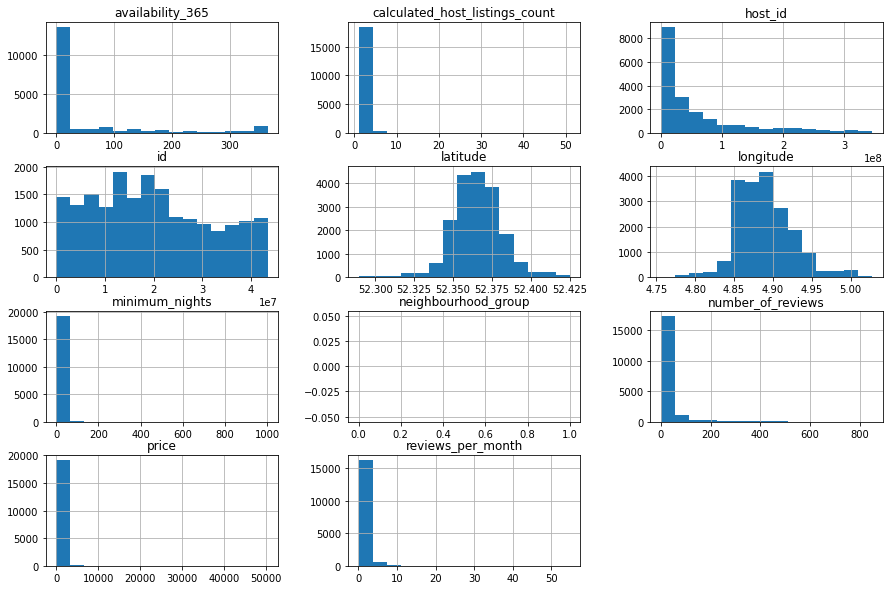

In [33]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q3.1 Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar usei o  Resumo estatístico por meio do método `describe()`

In [34]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19278.000000,19278.000000,19278.000000,16980.000000,19278.000000,19278.000000
mean,926.388382,3.517533,25.283017,0.790479,1.975101,54.549798
std,1307.413200,13.570089,54.496400,1.284863,4.482957,102.544437
min,27.950000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,553.410000,2.000000,2.000000,0.180000,1.000000,0.000000
50%,732.290000,2.000000,9.000000,0.410000,1.000000,0.000000
75%,1056.510000,3.000000,24.000000,0.810000,1.000000,65.000000
max,50310.000000,1001.000000,850.000000,54.800000,51.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de RS 1056, porém seu valor máximo é R$ 50310.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

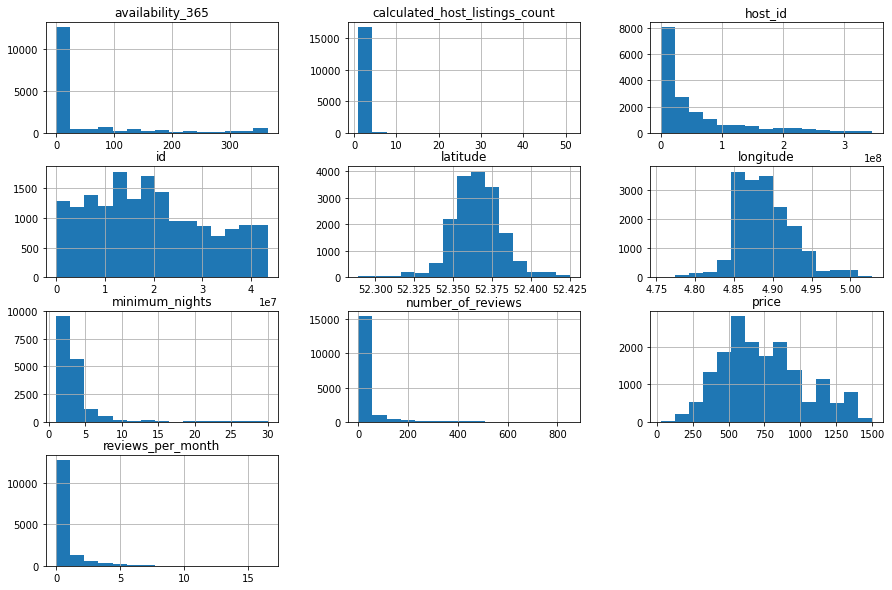

In [35]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Lembrando que vamos usar o Data Frame limpo acima `df_clean`

In [36]:
# ver a média da coluna `price`` em R$
df_clean.price.mean()


744.6817798175829

## **Q4.1 Qual a correlação existente entre as variáveis**
orrelação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação


In [37]:
# criar uma matriz de correlação
cor = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(cor)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.022625,-0.031412,-0.017266,0.049409,0.151654
minimum_nights,0.022625,1.000000,-0.022449,-0.032418,-0.006002,0.068968
number_of_reviews,-0.031412,-0.022449,1.000000,0.759372,-0.019915,0.280618
reviews_per_month,-0.017266,-0.032418,0.759372,1.000000,0.037681,0.317301
calculated_host_listings_count,0.049409,-0.006002,-0.019915,0.037681,1.000000,0.156956
availability_365,0.151654,0.068968,0.280618,0.317301,0.156956,1.000000


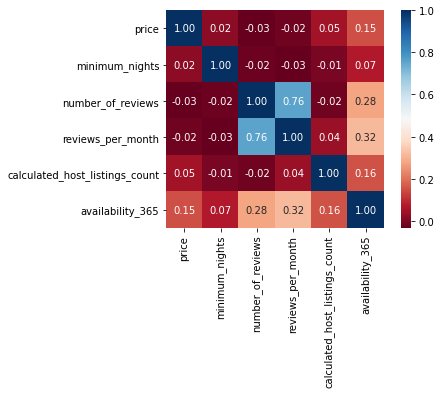

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(cor, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.


In [38]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13276
Private room        3807
Hotel room           202
Shared room           37
Name: room_type, dtype: int64

* `Entire home/apt ` - Casa ou Apto inteiro
* `Private room `    - Quarto privado
* `Shared room  `    - Quato Compartilhado

***Podemos Observar que a maioria dos hóspedes procuram alugar imóveis inteiros***

In [40]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    76.642420
Private room       21.977832
Hotel room          1.166147
Shared room         0.213601
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Amsterdam?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [51]:
# ver preços em Reais por bairros, na média por noite
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Centrum-West                              840.285871
Centrum-Oost                              836.818089
De Pijp - Rivierenbuurt                   785.142100
Zuid                                      772.935684
IJburg - Zeeburgereiland                  765.609704
Oud-Oost                                  750.451563
De Baarsjes - Oud-West                    747.912137
Westerpark                                744.349752
Watergraafsmeer                           710.499042
Noord-Oost                                701.325169
Oud-Noord                                 701.083797
Buitenveldert - Zuidas                    690.191858
Noord-West                                680.710919
Oostelijk Havengebied - Indische Buurt    675.183704
Bos en Lommer                             654.568103
Name: price, dtype: float64

In [52]:
# ver o minímo de noites de hospedagem por bairros, na média
df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)[:15]

neighbourhood
Gaasperdam - Driemond                     3.603448
Buitenveldert - Zuidas                    3.371681
Bijlmer-Oost                              3.250000
Watergraafsmeer                           3.149701
Centrum-Oost                              3.121523
Bijlmer-Centrum                           3.051282
Oud-Oost                                  3.048428
Oostelijk Havengebied - Indische Buurt    3.045606
Zuid                                      3.005231
IJburg - Zeeburgereiland                  2.980296
Centrum-West                              2.976082
Bos en Lommer                             2.955140
Noord-West                                2.954054
Westerpark                                2.948042
De Baarsjes - Oud-West                    2.929215
Name: minimum_nights, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

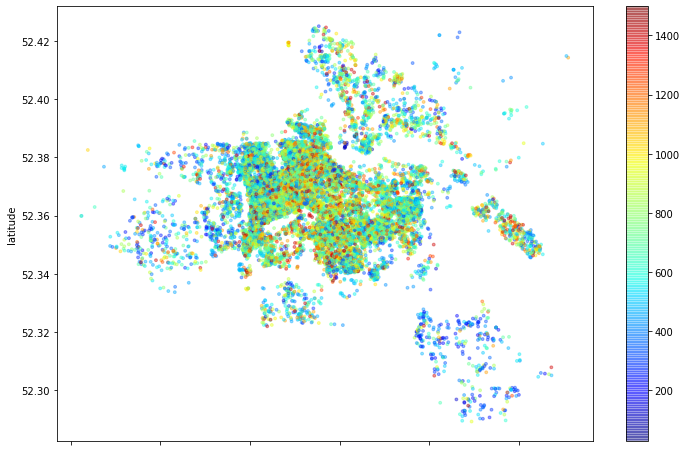

In [22]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [23]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.973559635146057

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb referente a Amsterdam, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Nesta análise percemos que em média o hospede fica 3 noites no local pagando um preço de R$ 744 por noite.

O imóveis mais alugados são as casas e apartamentos  inteiros que representam 76% do imóveis disponiveis para locação.

Os bairros que possuem os preços por noite mais caros são Centrum West e Centrum Oost com mêdia de R$ 840 por noite.


Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Em uma próxima análise exploratória, usaremos o conjunto de dados completos, com 106 atributos disponíveis.

